# <font color = green> **Практическая работа 1** </font>
<font color = green> Выполнила: Козлова Ульяна ММР 213 </font>

<font color = black> Датафрейм All Space Missions содержит информацию о полётах в космос с самого начала до 2020 года включительно https://www.kaggle.com/datasets/agirlcoding/all-space-missions-from-1957?datasetId=828921 </font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Space_Corrected.csv')


# <font color = black> **Подготовка датасета** </font>

In [2]:
print(df.shape)


(4324, 9)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed:        4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Company Name    4324 non-null   object
 3   Location        4324 non-null   object
 4   Datum           4324 non-null   object
 5   Detail          4324 non-null   object
 6   Status Rocket   4324 non-null   object
 7   Rocket          964 non-null    object
 8   Status Mission  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [4]:
print(df.head())


   Unnamed:  Unnamed: 0 Company Name  \
0         0           0       SpaceX   
1         1           1         CASC   
2         2           2       SpaceX   
3         3           3    Roscosmos   
4         4           4          ULA   

                                            Location  \
0         LC-39A, Kennedy Space Center, Florida, USA   
1  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2                      Pad A, Boca Chica, Texas, USA   
3       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4           SLC-41, Cape Canaveral AFS, Florida, USA   

                        Datum                                        Detail  \
0  Fri Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1  Thu Aug 06, 2020 04:01 UTC           Long March 2D | Gaofen-9 04 & Q-SAT   
2  Tue Aug 04, 2020 23:57 UTC            Starship Prototype | 150 Meter Hop   
3  Thu Jul 30, 2020 21:25 UTC  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4  Thu Jul 30, 2020 11:50 U

В используемом DataFrame задублирована колонка с номером, удалем обе

In [5]:
df = df.drop(['Unnamed:','Unnamed: 0' ], axis=1)


In [6]:
print(df)

     Company Name                                           Location  \
0          SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1            CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2          SpaceX                      Pad A, Boca Chica, Texas, USA   
3       Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4             ULA           SLC-41, Cape Canaveral AFS, Florida, USA   
...           ...                                                ...   
4319      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4320         AMBA           LC-26A, Cape Canaveral AFS, Florida, USA   
4321      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4322    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4323    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                           Datum  \
0     Fri Aug 07, 2020 05:12 UTC   
1     Thu Aug 06, 2020 04:01 UTC   
2     Tue Aug 04, 2020 23:5

Обновленный DataFrame имеет 7 столбцов и 4324 строки. Теперь для удобства переименуем столбцы.

In [7]:
df.rename(columns = {'Company Name':'Компания','Location':'Место запуска','Datum':'Дата и время запуска',
'Detail':'Название ракеты','Status Rocket':'Статус ракеты','Rocket':'Стоимость миссии','Status Mission':'Статус миссии'}, inplace = True)


In [8]:
print(df.columns)

Index(['Компания', 'Место запуска', 'Дата и время запуска', 'Название ракеты',
       'Статус ракеты', 'Стоимость миссии', 'Статус миссии'],
      dtype='object')


Выведем информацию о DataFrame повторно для проверки данных

In [9]:
df.info()
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Компания              4324 non-null   object
 1   Место запуска         4324 non-null   object
 2   Дата и время запуска  4324 non-null   object
 3   Название ракеты       4324 non-null   object
 4   Статус ракеты         4324 non-null   object
 5   Стоимость миссии      964 non-null    object
 6   Статус миссии         4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB
    Компания                                      Место запуска  \
0     SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1       CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2     SpaceX                      Pad A, Boca Chica, Texas, USA   
3  Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4        ULA           SLC-41, Cape Canaveral AFS, Florida, USA   


Колонка стоимости не готова к выводу, колонку 'Дата и время запуска' стоит разбить на 2.  

Начнём с колонки стоимости полётов. В данной колонке есть две проблемы, которые мешают провести анализ:

1)Неверный тип данных ((object вместо необходимого int64 или float64). - после доработки данных с помощью метода apply() задать необходимый тип 
2)Недостаточно данных. 

Есть 4 решения: 
1) Удалить данный столбец - нежелательный вариант из-за потери данных 
2) Заменить каким-то новым значением, который не встречается в столбце - возможный, но не самый лучший
3) Найти среднее значение стоимости полетов для компаний, у которых не заполнен данный столбец и заполнить им пропуски 
4) Оценить необходимость данных компаний для полноценного анализа. 

Для решения выберем 3-ий вариант

Для начала выведем DataFrame с названиями компаний и средней ценой полетов. Для этого создадим побочный DataFrame temp и сохраним туда только те строчки, где нет пустых значений в этом столбце, применим тип данных float ко всем значениям. По итогу выведем среднее значение стоимости для каждой колонки, если у компании не будет средней цены или она будет равна 0 - уберем их из анализа.

In [10]:
temp = df[df['Стоимость миссии'] != 'NaN']

In [11]:
temp.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Компания              4324 non-null   object
 1   Место запуска         4324 non-null   object
 2   Дата и время запуска  4324 non-null   object
 3   Название ракеты       4324 non-null   object
 4   Статус ракеты         4324 non-null   object
 5   Стоимость миссии      964 non-null    object
 6   Статус миссии         4324 non-null   object
dtypes: object(7)
memory usage: 270.2+ KB


Создадим функцию, которая заменит нулевое значение в столбце на среднее

In [12]:
def price_float64(price):
    price = str(price).replace('.','')
    if ',' in str(price):
        price = str(price).replace(',','.')
    if ' ' in str(price):
        price = str(price).replace(' ','')
    return float(price)
temp['Стоимость миссии'] = temp['Стоимость миссии'].apply(price_float64)

In [13]:
temp.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Компания              4324 non-null   object 
 1   Место запуска         4324 non-null   object 
 2   Дата и время запуска  4324 non-null   object 
 3   Название ракеты       4324 non-null   object 
 4   Статус ракеты         4324 non-null   object 
 5   Стоимость миссии      964 non-null    float64
 6   Статус миссии         4324 non-null   object 
dtypes: float64(1), object(6)
memory usage: 270.2+ KB


In [16]:
Company_mean = temp.groupby('Компания')['Стоимость миссии'].mean()
print(Company_mean)
Company_mean = Company_mean.reset_index()
Company_mean_dict = {
    'Arianespace': 1702.604167,
    'Boeing': 1772.857143,
    'CASC': 2639.753165,
    'EER': 200.000000,
    'Eurockot': 418.000000,
    'ExPace': 283.000000,
    'ILS': 1015.384615,
    'ISRO': 324.925373,
    'JAXA': 560.000000,
    'Kosmotras': 290.000000,
    'Lockheed': 350.000000,
    'MHI': 954.729730,
    'Martin Marietta':801.555556,
    'NASA':4107.483758,
    'Northrop':473.493976,
    'RVSN USSR':5.000000,
    'Rocket Lab':75.000000,
    'Roscosmos':516.304348,
    'Sandia':150.000000,
    'SpaceX':549.898990,
    'ULA':1510.000000,
    'US Air Force':1472.000000,
    'VKS RF':469.363636,
    'Virgin Orbit':120.000000,
}


Компания
AEB                         NaN
AMBA                        NaN
ASI                         NaN
Arianespace         1702.604167
Arm??e de l'Air             NaN
Blue Origin                 NaN
Boeing              1772.857143
CASC                2639.753165
CASIC                       NaN
CECLES                      NaN
CNES                        NaN
Douglas                     NaN
EER                  200.000000
ESA                  370.000000
Eurockot             418.000000
ExPace               283.000000
Exos                        NaN
General Dynamics            NaN
IAI                         NaN
ILS                 1015.384615
IRGC                        NaN
ISA                         NaN
ISAS                        NaN
ISRO                 324.925373
JAXA                 560.000000
KARI                        NaN
KCST                        NaN
Khrunichev                  NaN
Kosmotras            290.000000
Land Launch                 NaN
Landspace                   NaN

In [17]:
def NaN_price_float64(row):
    if pd.isnull(row['Стоимость миссии']):
        if row['Компания'] in Company_mean_dict:
            return Company_mean_dict[row['Компания']]
df['Стоимость миссии'] = df.apply(NaN_price_float64, axis = 1)
df = df.dropna(axis=0)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2890 entries, 2 to 4323
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Компания              2890 non-null   object 
 1   Место запуска         2890 non-null   object 
 2   Дата и время запуска  2890 non-null   object 
 3   Название ракеты       2890 non-null   object 
 4   Статус ракеты         2890 non-null   object 
 5   Стоимость миссии      2890 non-null   float64
 6   Статус миссии         2890 non-null   object 
dtypes: float64(1), object(6)
memory usage: 180.6+ KB
None


В DataFrame только те строки и компании для которых было возможным
дать стоимость миссии

Заменим столбец с датой на столбец с годом запуска DataFrame

In [18]:
def data_f(data):
    data = data.split(', ')[1][0:4]
    return int(data)
df['Дата и время запуска'] = df['Дата и время запуска'].apply(data_f)
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2890 entries, 2 to 4323
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Компания              2890 non-null   object 
 1   Место запуска         2890 non-null   object 
 2   Дата и время запуска  2890 non-null   int64  
 3   Название ракеты       2890 non-null   object 
 4   Статус ракеты         2890 non-null   object 
 5   Стоимость миссии      2890 non-null   float64
 6   Статус миссии         2890 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 180.6+ KB
None


# <font color = black> **Исследование и анализ** </font>

Какие варианты статуса миссии могут быть?

In [19]:
print(df['Статус миссии'].value_counts())


Success              2618
Failure               206
Partial Failure        65
Prelaunch Failure       1
Name: Статус миссии, dtype: int64


In [20]:
def mission(status):
    if status == 'Partial Failure' or status == 'Prelaunch Failure':
        return 'Failure'
    return 'Success'
df['Статус миссии'] = df['Статус миссии'].apply(mission)
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2890 entries, 2 to 4323
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Компания              2890 non-null   object 
 1   Место запуска         2890 non-null   object 
 2   Дата и время запуска  2890 non-null   int64  
 3   Название ракеты       2890 non-null   object 
 4   Статус ракеты         2890 non-null   object 
 5   Стоимость миссии      2890 non-null   float64
 6   Статус миссии         2890 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 180.6+ KB
None


Выведем статистику компаний по количеству успешных полетов

In [21]:
company_success = df[df['Статус миссии'] == 'Success']
print('Выведем статистику компаний по  количеству  успешных  полетов')
print(company_success['Компания'].value_counts())


Выведем статистику компаний по  количеству  успешных  полетов
RVSN USSR          1733
Arianespace         181
VKS RF              164
US Air Force        134
Boeing              128
Martin Marietta     102
CASC                 90
Lockheed             71
NASA                 49
MHI                  45
ULA                  42
Roscosmos            32
ILS                  32
ExPace                9
ISRO                  7
JAXA                  4
SpaceX                1
Name: Компания, dtype: int64


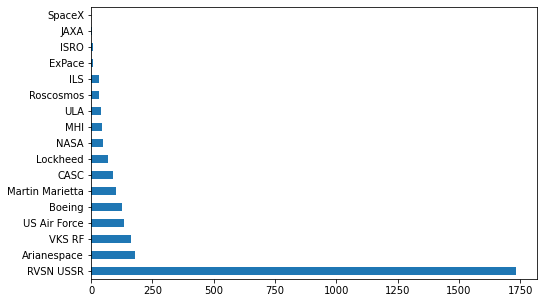

In [44]:
company_success['Компания'].value_counts().plot(kind = 'barh', figsize = (8, 5))
plt.show()

Выведем статистику компаний по количеству неудачных полетов

In [22]:
company_failure = df[df['Статус миссии'] == 'Failure']
print('Выведем статистику компаний по  количеству  неудачных  полетов')
print(company_failure['Компания'].value_counts())


Выведем статистику компаний по  количеству  неудачных  полетов
RVSN USSR          42
NASA                5
VKS RF              4
CASC                3
Martin Marietta     3
Arianespace         2
MHI                 2
ISRO                2
ILS                 1
Boeing              1
US Air Force        1
Name: Компания, dtype: int64


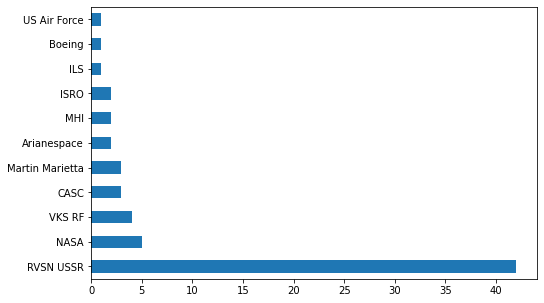

In [45]:
company_failure['Компания'].value_counts().plot(kind = 'barh', figsize = (8, 5))
plt.show()

Выведем статистику компаний по количеству успешных полетов после 2000 года

In [25]:
company_success_2000 = df[(df['Статус миссии'] == 'Success')&(df['Дата и время запуска']>=2000)]
print('Выведем статистику компаний по  количеству  успешных  полетов после 2000 года')
print(company_success_2000['Компания'].value_counts())


Выведем статистику компаний по  количеству  успешных  полетов после 2000 года
Arianespace    68
VKS RF         62
CASC           48
ULA            42
Boeing         39
Roscosmos      31
Lockheed       26
MHI            13
ILS            11
ExPace          9
JAXA            4
SpaceX          1
ISRO            1
Name: Компания, dtype: int64


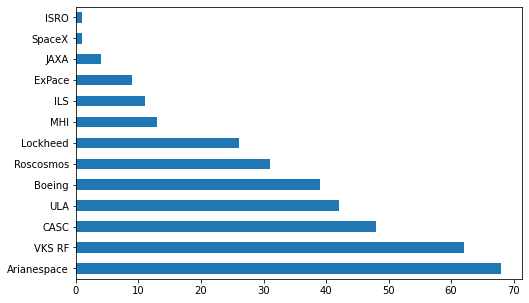

In [46]:
company_success_2000['Компания'].value_counts().plot(kind = 'barh', figsize = (8, 5))
plt.show()

Выведем статистику компаний по  количеству  неудачных  полетов после 2000 года

In [26]:
company_failure_2000 = df[(df['Статус миссии'] == 'Failure')&(df['Дата и время запуска']>=2000)]
print('Выведем статистику компаний по  количеству  неудачных  полетов после 2000 года')
print(company_failure_2000['Компания'].value_counts())


Выведем статистику компаний по  количеству  неудачных  полетов после 2000 года
VKS RF         2
Arianespace    2
Name: Компания, dtype: int64


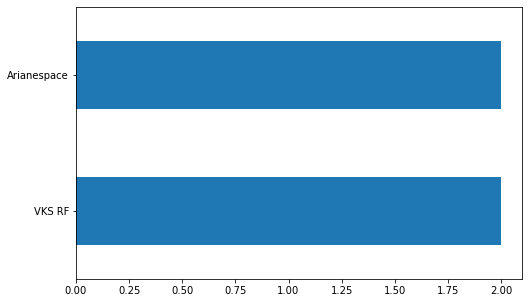

In [47]:
company_failure_2000['Компания'].value_counts().plot(kind = 'barh', figsize = (8, 5))
plt.show()

Выведем статистику компаний по  количеству  успешных  полетов до 2000 года

In [27]:
company_success_until_2000 = df[(df['Статус миссии'] == 'Success')&(df['Дата и время запуска']<2000)]
print('# Выведем статистику компаний по  количеству  успешных  полетов до 2000 года')
print(company_success_until_2000 ['Компания'].value_counts())


# Выведем статистику компаний по  количеству  успешных  полетов до 2000 года
RVSN USSR          1733
US Air Force        134
Arianespace         113
VKS RF              102
Martin Marietta     102
Boeing               89
NASA                 49
Lockheed             45
CASC                 42
MHI                  32
ILS                  21
ISRO                  6
Roscosmos             1
Name: Компания, dtype: int64


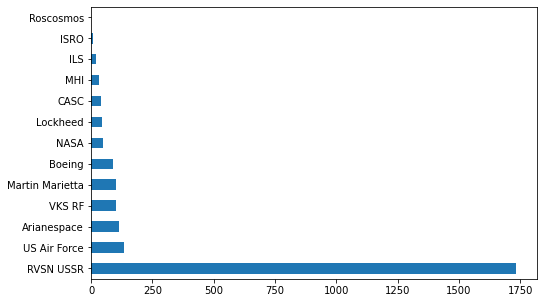

In [48]:
company_success_until_2000['Компания'].value_counts().plot(kind = 'barh', figsize = (8, 5))
plt.show()

Выведем статистику компаний по  количеству  неудачных  полетов до 2000 года

In [28]:
company_failure_until_2000 = df[(df['Статус миссии'] == 'Failure')&(df['Дата и время запуска']<2000)]
print('Выведем статистику компаний по  количеству  неудачных  полетов до 2000 года')
print(company_failure_until_2000['Компания'].value_counts())

Выведем статистику компаний по  количеству  неудачных  полетов до 2000 года
RVSN USSR          42
NASA                5
CASC                3
Martin Marietta     3
VKS RF              2
MHI                 2
ISRO                2
ILS                 1
Boeing              1
US Air Force        1
Name: Компания, dtype: int64


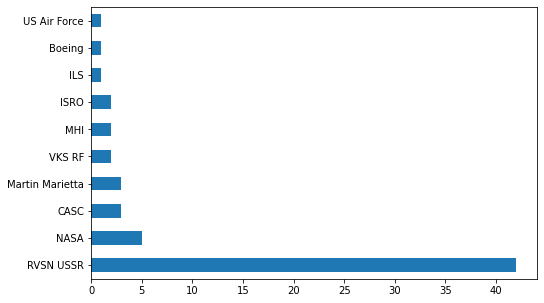

In [50]:
company_failure_until_2000['Компания'].value_counts().plot(kind = 'barh', figsize = (8, 5))
plt.show()

Найдём отношение успешных полётов после 2000 года к не успешным исходя из  среднего значения

In [29]:
print('Найдём отношение успешных полётов после 2000 года к не успешным исходя из  среднего значения')
print(len(company_success_2000)/len(company_failure_2000))


Найдём отношение успешных полётов после 2000 года к не успешным исходя из  среднего значения
88.75


Найдём отношение успешных полётов до 2000 года к не успешным исходя из  среднего значения

In [30]:
print('Найдём отношение успешных полётов до 2000 года к не успешным исходя из  среднего значения ')
print(len(company_success_until_2000)/len(company_failure_until_2000))

Найдём отношение успешных полётов до 2000 года к не успешным исходя из  среднего значения 
39.82258064516129


Найдём отношение успешных полётов к не успешным исходя из  среднего значения

In [31]:
print('Найдём отношение успешных полётов к не успешным исходя из  среднего значения ')
print(len(company_success)/len(company_failure))


Найдём отношение успешных полётов к не успешным исходя из  среднего значения 
42.78787878787879


Выведем статистику по средней стоимости миссий

In [32]:
print('Выведем статистику по средней стоимости миссий')
print(df.groupby('Компания')['Стоимость миссии'].mean())

Выведем статистику по средней стоимости миссий
Компания
Arianespace        1702.604167
Boeing             1772.857143
CASC               2639.753165
ExPace              283.000000
ILS                1015.384615
ISRO                324.925373
JAXA                560.000000
Lockheed            350.000000
MHI                 954.729730
Martin Marietta     801.555556
NASA               4107.483758
RVSN USSR             5.000000
Roscosmos           516.304348
SpaceX              549.898990
ULA                1510.000000
US Air Force       1472.000000
VKS RF              469.363636
Name: Стоимость миссии, dtype: float64


Как менялась стоимость миссий в зависимости от года

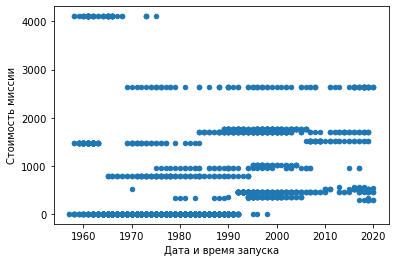

In [51]:
df.plot(x = 'Дата и время запуска', y = 'Стоимость миссии', kind = 'scatter')

plt.show()

Изменение затрат на миссии

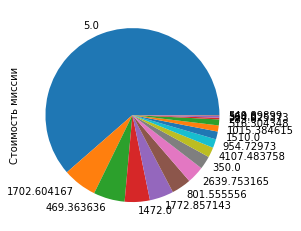

In [52]:
df['Стоимость миссии'].value_counts().plot(kind = 'pie')
plt.show()

# <font color = black> **Выводы** </font>


За время становления полётов в космос затраты на реализацию миссий сильно возросли, но при этом уменьшилась провальность миссий

Наиболее сильными компаниями на момент 2020 года оказались :

Arianespace

VKS RF

CASC

ULA

Boeing

Roscosmos

В 20 веке такими компаниями были:

RVSN USSR

US Air Force

Arianespace

Martin Marietta

VKS RF

Boeing